In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

In [2]:
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.ExcelFile(file_path)


Saving QC_Plot.xlsx to QC_Plot.xlsx


In [3]:
df = data.parse('Sheet1')

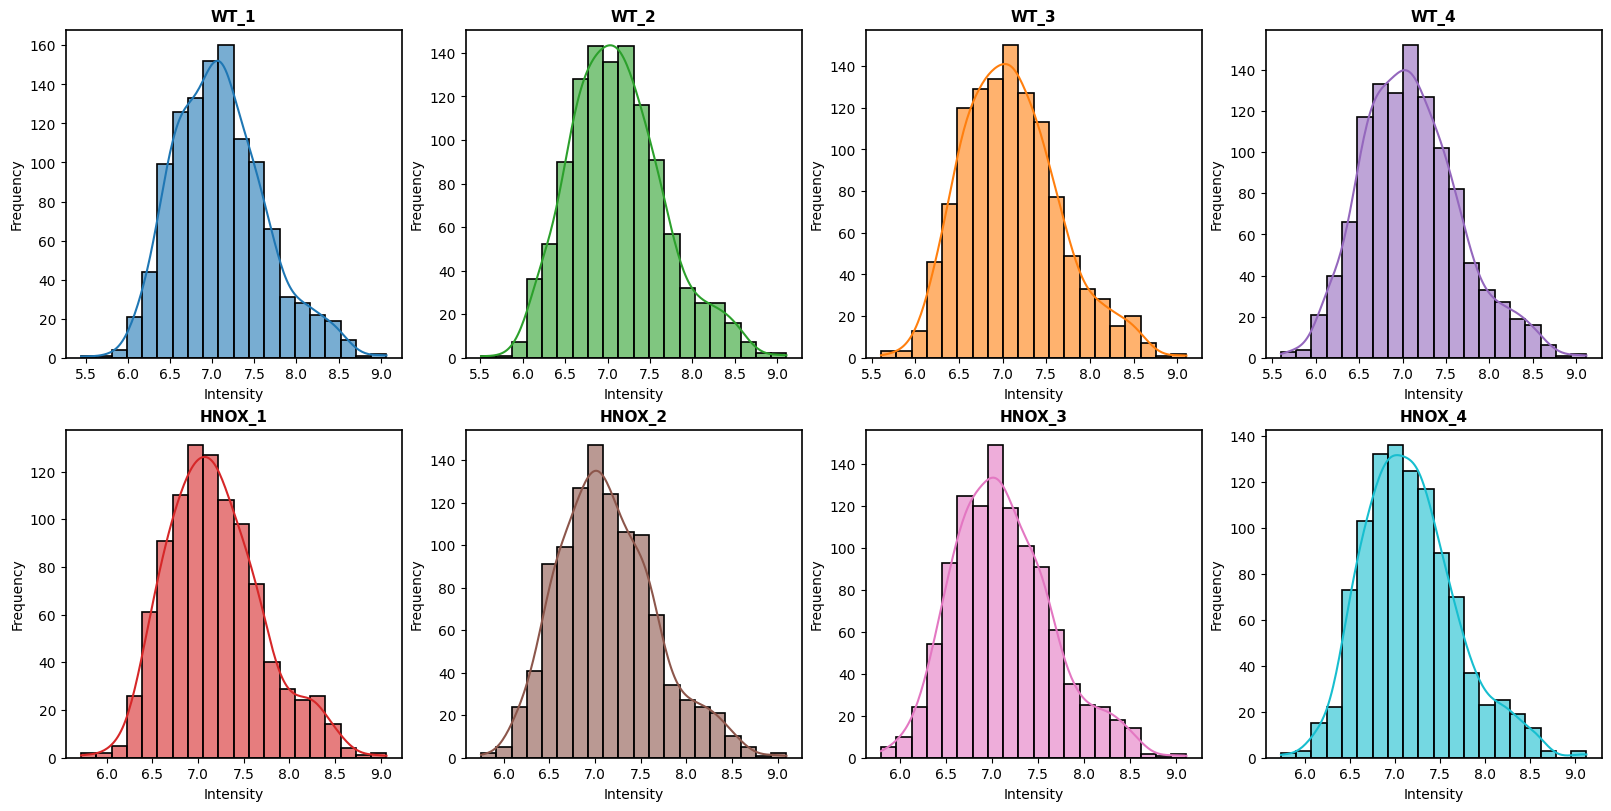

In [4]:
# Define the conditions and colors
conditions = ['WT_1', 'WT_2', 'WT_3','WT_4', 'HNOX_1', 'HNOX_2', 'HNOX_3', 'HNOX_4']
num_conditions = len(conditions)

# Define your custom color palette
# You can use named colors, hex codes, or RGB tuples
colors = [
    '#1f77b4',  # WT_1  (blue)
    '#2ca02c',  # WT_2  (green)
    '#ff7f0e',  # WT_3  (orange)
    '#9467bd',  # WT_4  (purple)
    '#d62728',  # HNOX_1 (red)
    '#8c564b',  # HNOX_2 (brown)
    '#e377c2',  # HNOX_3 (pink)
    '#17becf'   # HNOX_4 (cyan)
]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), constrained_layout=True)
axes = axes.flatten()

# Plot each histogram
for i, (col, color) in enumerate(zip(conditions, colors)):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i], color=color, alpha=0.6, linewidth=1.2)
    axes[i].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Intensity', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(False)
    for spine in axes[i].spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.2)

# Remove unused subplots (in case fewer conditions than axes)
for j in range(num_conditions, len(axes)):
    fig.delaxes(axes[j])

# Save high-resolution images
png_path = 'Histogram_600dpi.png'
pdf_path = 'Histograml.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)
plt.show()